In [1]:
import VGG_help
from VGG_help import prepare_dataset, vgg_model, cv_train_vgg_model, plot_train_history, evaluate_test_set
import CNN_Classification
from CNN_Classification import fit_classification_model_cv

2024-04-22 15:47:11.317649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
VGG_help.sns.set_theme()
path_dir = VGG_help.os.getcwd()
VGG_help.np.random.seed(123)
VGG_help.tf.random.set_seed(123)

In [3]:
def test_on_data(dataset_dir, model):
    class_labels = ['NORMAL', 'PNEUMONIA']
    X_test, y_test = prepare_dataset(dataset_dir, class_labels, target_size=(128, 128))
    metrics_dict, cf_matrix = evaluate_test_set(model, X_test, y_test)
    return metrics_dict, cf_matrix

# CNN on Original

In [4]:
dataset_dir = f'{path_dir}/Original'
class_labels = ['NORMAL', 'PNEUMONIA']

In [5]:
X, y = prepare_dataset(dataset_dir, class_labels, target_size=(128, 128))

In [7]:
Orig_CNN_hist, original_cnn_model=fit_classification_model_cv(X,y)

Processing Fold 1...
Epoch 1/10
10/10 [==============================] - 1s 48ms/step - loss: 1.8394 - accuracy: 0.7177 - val_loss: 4.2030 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 0s 29ms/step - loss: 1.0460 - accuracy: 0.9235 - val_loss: 1.3359 - val_accuracy: 0.7750
Epoch 3/10
10/10 [==============================] - 0s 30ms/step - loss: 0.7646 - accuracy: 0.9670 - val_loss: 2.4596 - val_accuracy: 0.5375
Epoch 4/10
10/10 [==============================] - 0s 30ms/step - loss: 0.8147 - accuracy: 0.9595 - val_loss: 1.1375 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 0s 30ms/step - loss: 0.7012 - accuracy: 0.9979 - val_loss: 1.0938 - val_accuracy: 0.8375
Epoch 6/10
10/10 [==============================] - 0s 30ms/step - loss: 0.7064 - accuracy: 0.9905 - val_loss: 0.8156 - val_accuracy: 0.9375
Epoch 7/10
10/10 [==============================] - 0s 31ms/step - loss: 0.6840 - accuracy: 0.9944 - val_loss: 0.7262 - val_accuracy:

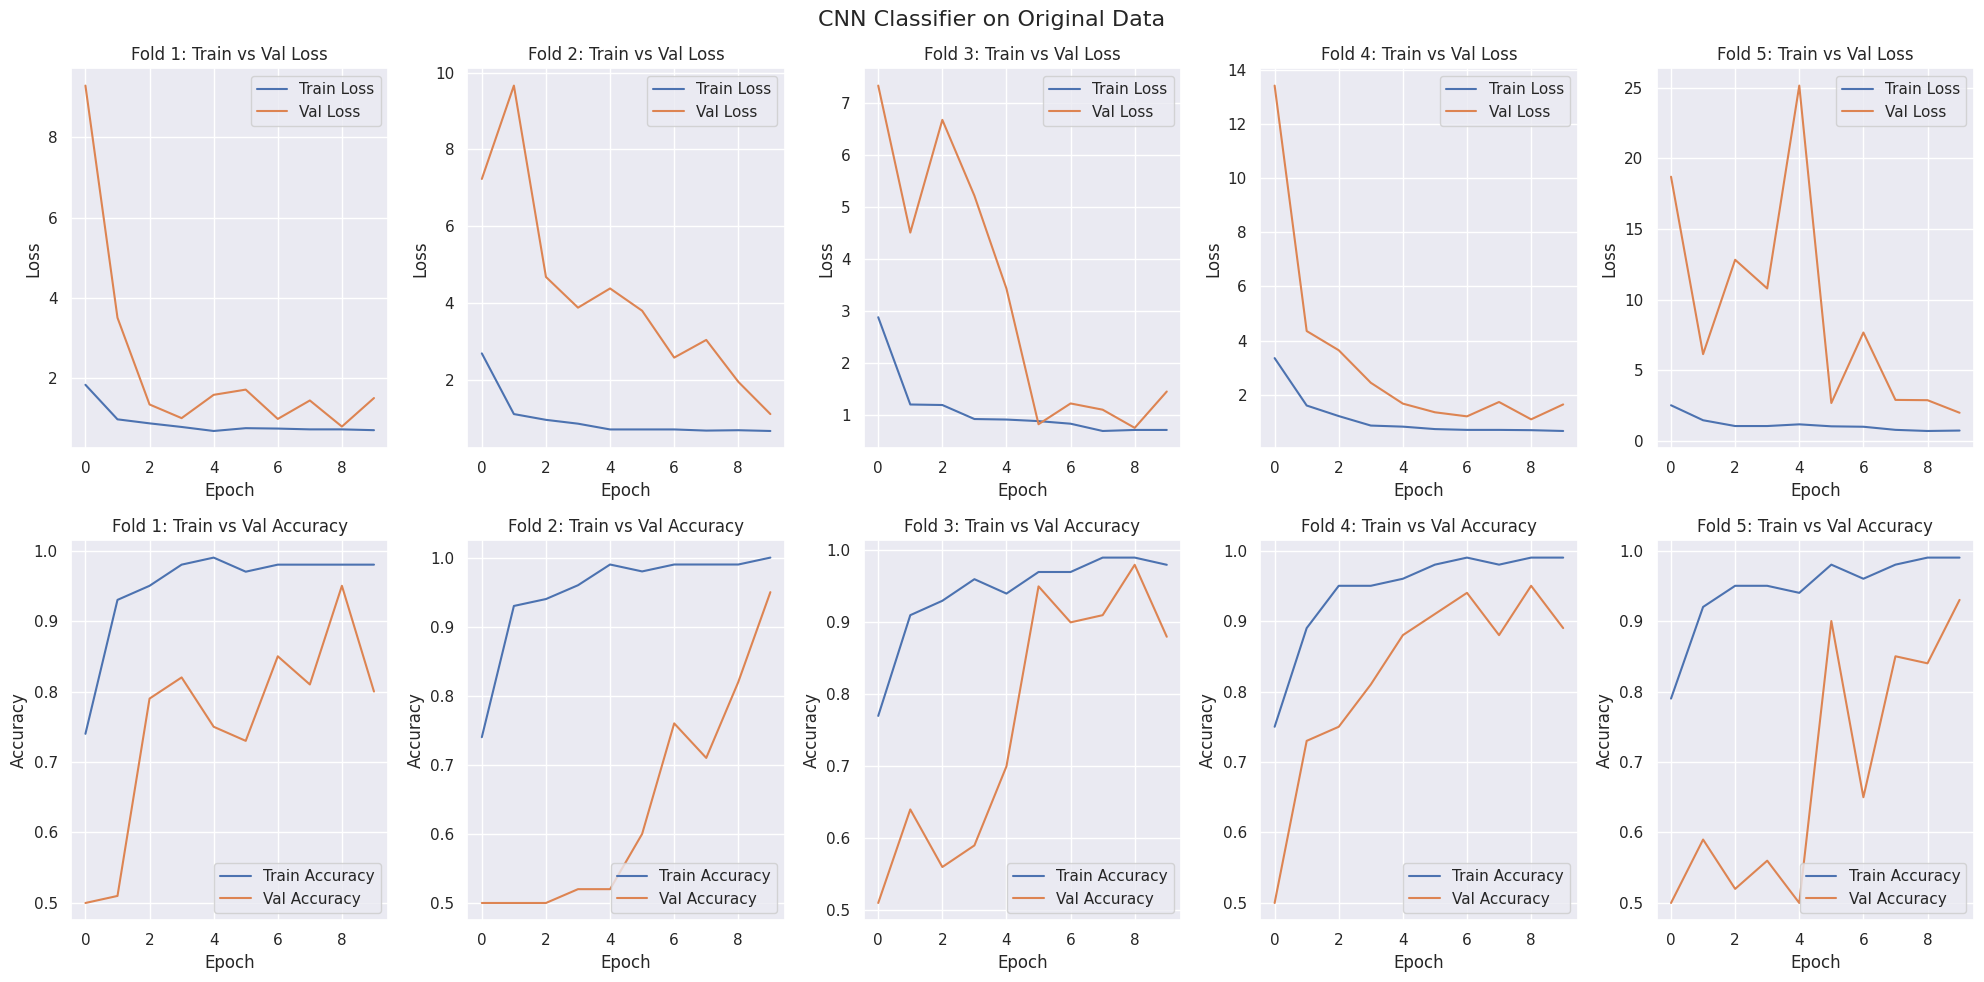

In [7]:
plot_train_history(Orig_CNN_hist, 'CNN Classifier on Original Data', 'cnn_orig.png')

# Testing

In [8]:
test_dataset_dir = '/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/Data/Test'


In [9]:
orig_CNN_metrics, orig_CNN_cf_matrix=test_on_data(test_dataset_dir,  original_cnn_model)

100/100 [==============================] - 5s 46ms/step - loss: 0.9614 - accuracy: 0.9337


In [10]:
orig_CNN_metrics

{'Test Loss': 0.9614,
 'Test Accuracy': 0.9337,
 'F1 Score': 0.93,
 'Sensitivity (Recall)': 0.93,
 'Precision': 0.94}

# CNN on Mixed DDPM +Original

In [8]:
X, y = prepare_dataset('/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification/Data/Generated/Mixed', class_labels, target_size=(128, 128))
MixDDPM_Data_CNN_hist, MixDDPM_CNN_model=fit_classification_model_cv(X,y)

Processing Fold 1...
Epoch 1/10
20/20 [==============================] - 1s 37ms/step - loss: 2.3375 - accuracy: 0.6856 - val_loss: 1.5179 - val_accuracy: 0.7750
Epoch 2/10
20/20 [==============================] - 1s 27ms/step - loss: 1.0440 - accuracy: 0.8941 - val_loss: 1.0183 - val_accuracy: 0.9062
Epoch 3/10
20/20 [==============================] - 1s 28ms/step - loss: 0.8504 - accuracy: 0.9488 - val_loss: 0.9107 - val_accuracy: 0.9062
Epoch 4/10
20/20 [==============================] - 1s 28ms/step - loss: 0.8104 - accuracy: 0.9632 - val_loss: 0.8375 - val_accuracy: 0.9563
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 0.7001 - accuracy: 0.9913 - val_loss: 0.7964 - val_accuracy: 0.9500
Epoch 6/10
20/20 [==============================] - 1s 27ms/step - loss: 0.6987 - accuracy: 0.9853 - val_loss: 0.8869 - val_accuracy: 0.9000
Epoch 7/10
20/20 [==============================] - 1s 27ms/step - loss: 0.6651 - accuracy: 0.9951 - val_loss: 0.7605 - val_accuracy:

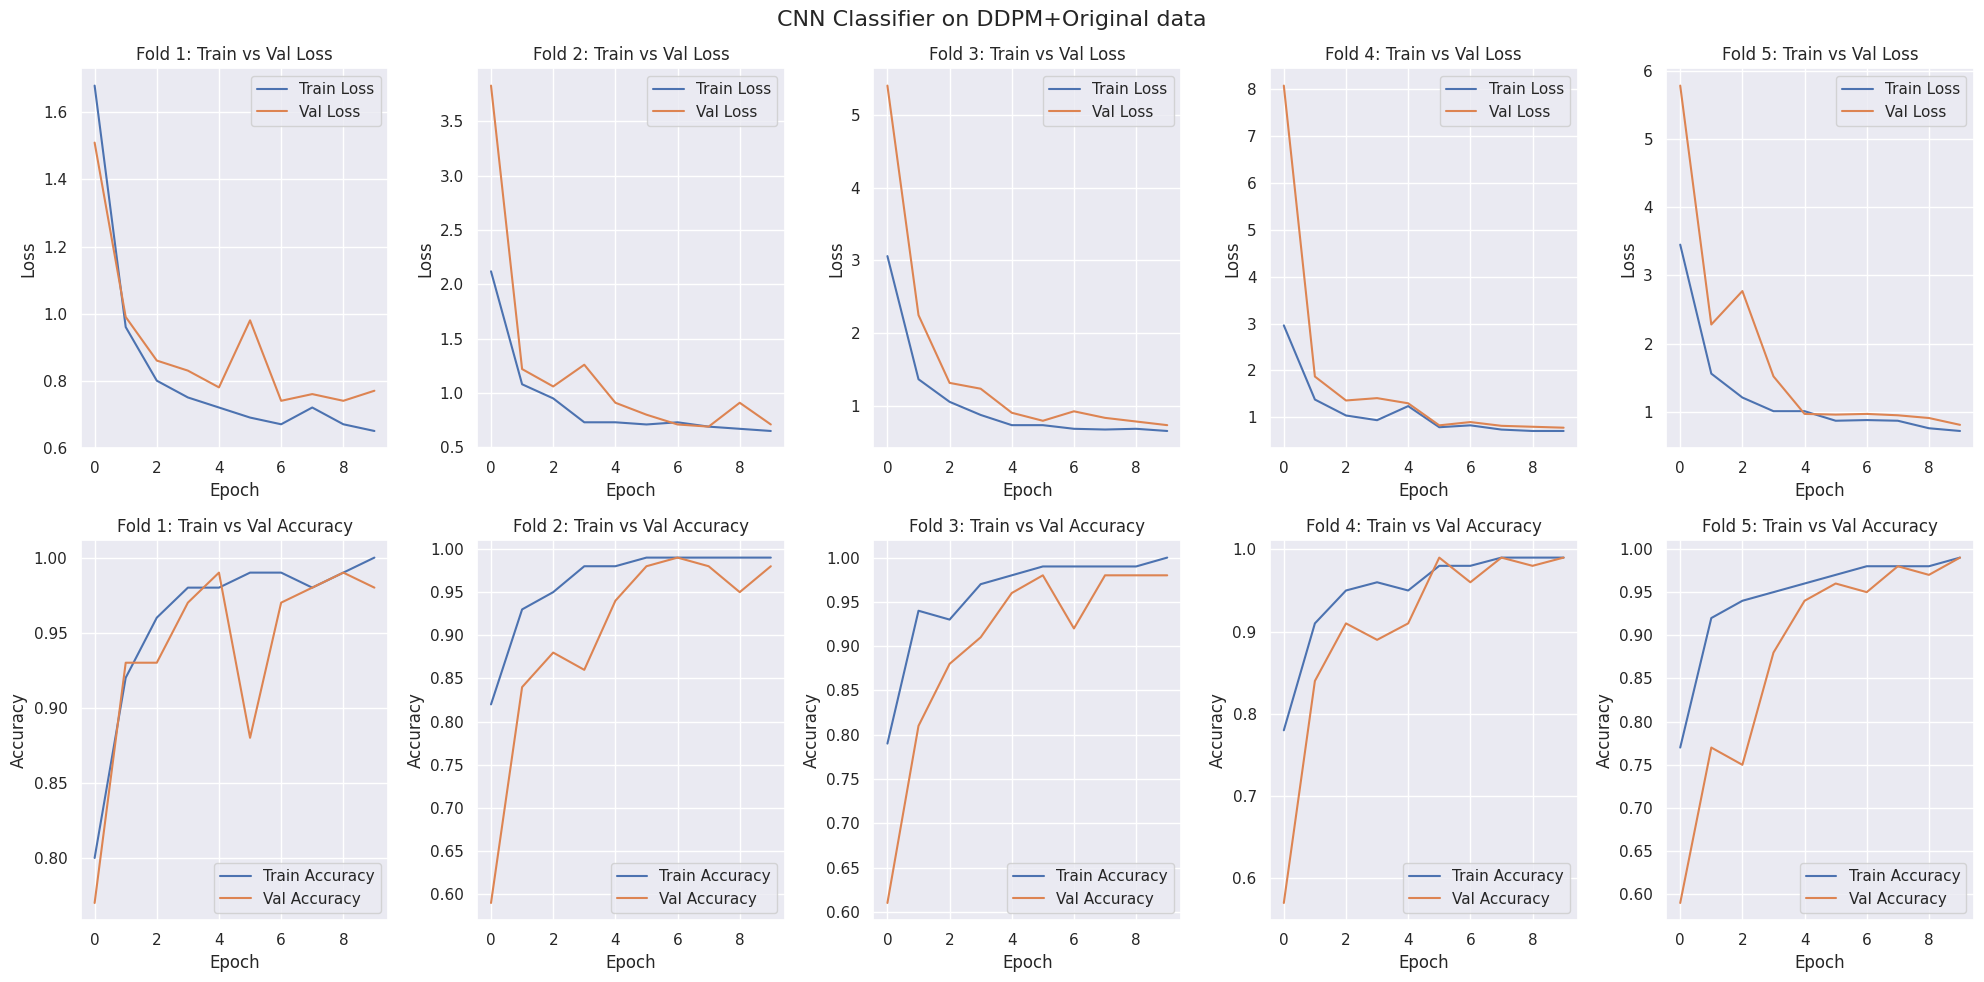

In [12]:
plot_train_history(MixDDPM_Data_CNN_hist, 'CNN Classifier on DDPM+Original data', 'ccn_ddpm.png')

In [13]:
DDPM_CNN_metrics, DDPM_CNN_cf_matrix=test_on_data(test_dataset_dir,  MixDDPM_CNN_model)

100/100 [==============================] - 1s 9ms/step - loss: 1.0558 - accuracy: 0.9453


In [14]:
DDPM_CNN_metrics

{'Test Loss': 1.0558,
 'Test Accuracy': 0.9453,
 'F1 Score': 0.95,
 'Sensitivity (Recall)': 0.95,
 'Precision': 0.95}

In [12]:
MixDDPM_Data_CNN_hist.to_csv('CNN_DDPM.csv')

# CNN on Mixed PGGAN150 +Original

In [9]:
X, y = prepare_dataset('/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification/DataPGANS/Mixed', class_labels, target_size=(128, 128))
MixPGGAN_Data_CNN_hist, MixPGGAN_CNN_model=fit_classification_model_cv(X,y)

Processing Fold 1...
Epoch 1/10
20/20 [==============================] - 1s 35ms/step - loss: 2.0166 - accuracy: 0.7091 - val_loss: 2.4285 - val_accuracy: 0.6562
Epoch 2/10
20/20 [==============================] - 1s 27ms/step - loss: 0.9568 - accuracy: 0.9223 - val_loss: 1.1510 - val_accuracy: 0.8625
Epoch 3/10
20/20 [==============================] - 1s 27ms/step - loss: 0.9047 - accuracy: 0.9575 - val_loss: 1.1883 - val_accuracy: 0.8000
Epoch 4/10
20/20 [==============================] - 1s 27ms/step - loss: 1.0100 - accuracy: 0.9563 - val_loss: 1.1612 - val_accuracy: 0.8000
Epoch 5/10
20/20 [==============================] - 1s 27ms/step - loss: 0.7507 - accuracy: 0.9656 - val_loss: 1.0495 - val_accuracy: 0.8813
Epoch 6/10
20/20 [==============================] - 1s 27ms/step - loss: 0.7460 - accuracy: 0.9795 - val_loss: 0.9114 - val_accuracy: 0.9250
Epoch 7/10
20/20 [==============================] - 1s 27ms/step - loss: 0.6697 - accuracy: 0.9979 - val_loss: 1.0302 - val_accuracy:

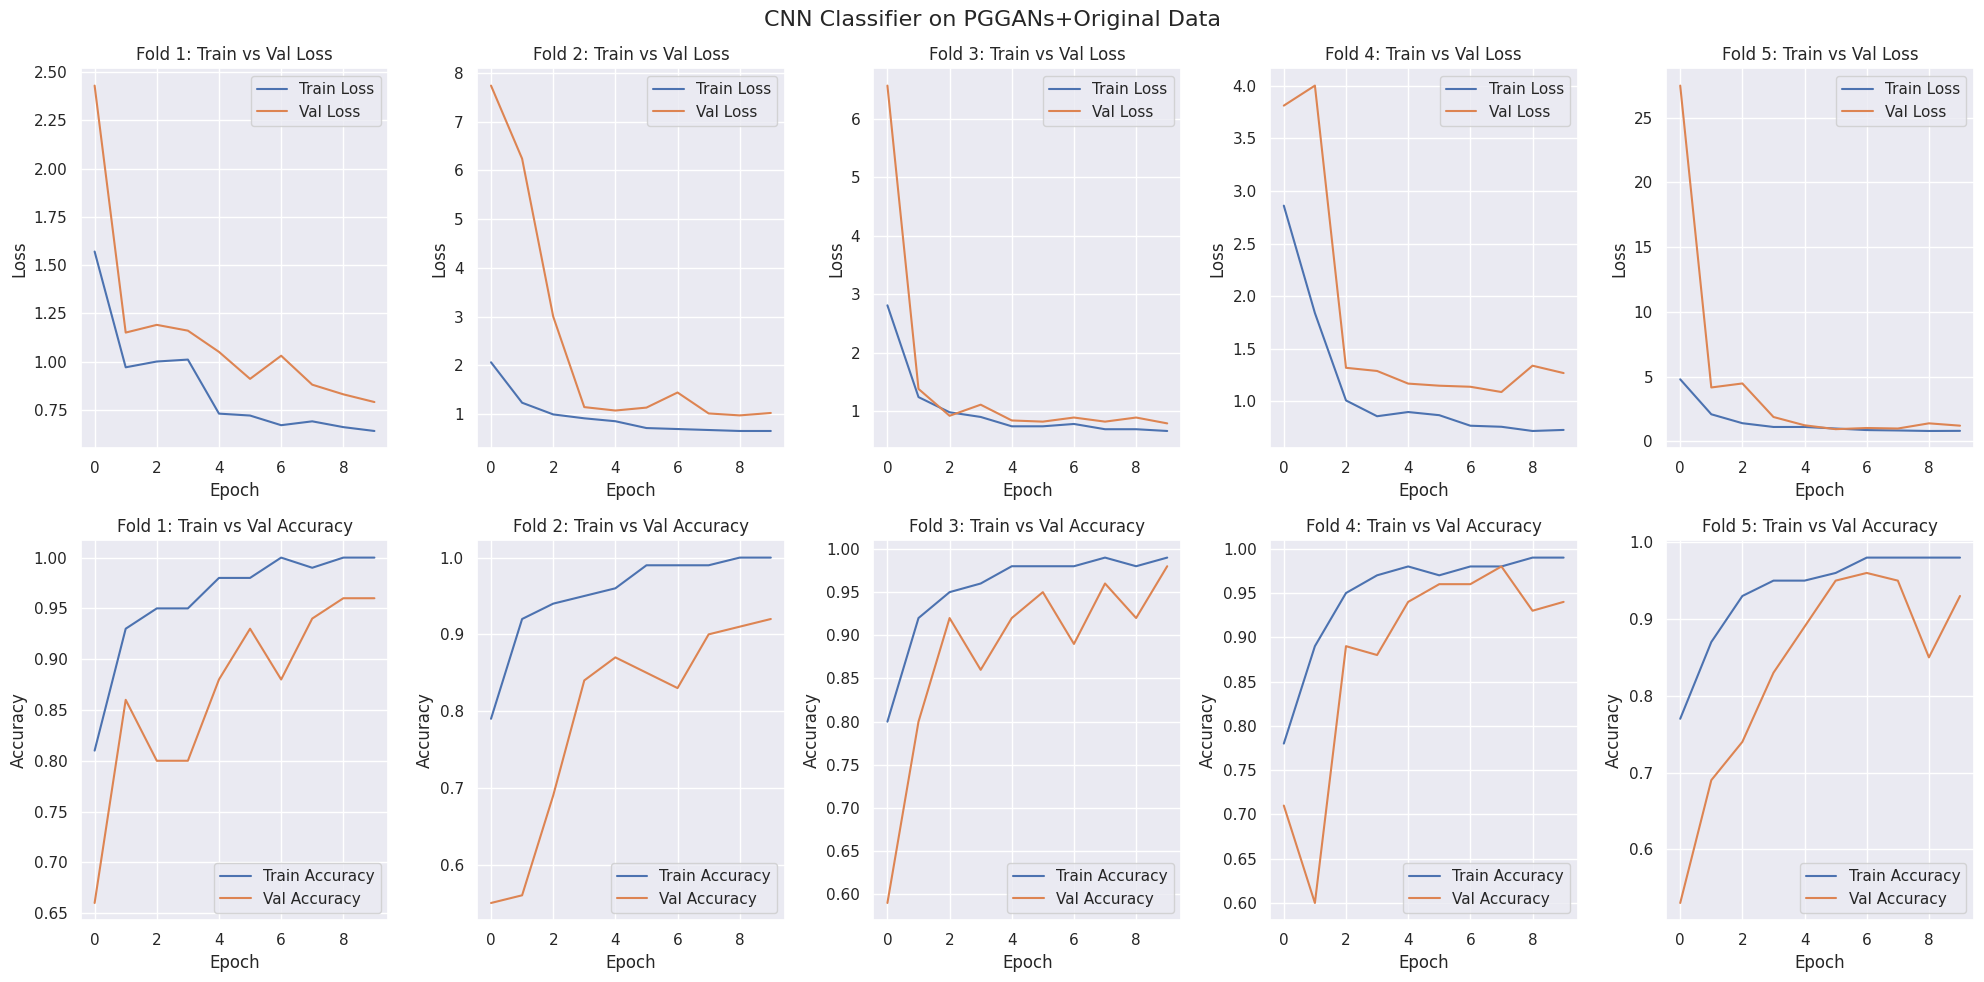

In [17]:
plot_train_history(MixPGGAN_Data_CNN_hist, 'CNN Classifier on PGGANs+Original Data', 'cnn_pggan.png')

In [11]:
MixPGGAN_Data_CNN_hist.to_csv('CNN_PGGAN.csv')

In [15]:
PGGAN_CNN_metrics, PGGAN_CNN_cf_matrix=test_on_data(test_dataset_dir,  MixPGGAN_CNN_model)

100/100 [==============================] - 5s 45ms/step - loss: 1.1514 - accuracy: 0.9211


In [16]:
PGGAN_CNN_metrics

{'Test Loss': 1.1514,
 'Test Accuracy': 0.9211,
 'F1 Score': 0.92,
 'Sensitivity (Recall)': 0.92,
 'Precision': 0.93}

# CNN on PGGAN160+Original

In [9]:
X, y = prepare_dataset('/users/PCS0218/nonlinearity114/CS7200_SP2024_Project_G01/Notebooks/VGG16-classification/DataPGANS/Mixed160', class_labels, target_size=(128, 128))
MixPGGAN_Data_CNN_hist160, MixPGGAN_CNN_model160=fit_classification_model_cv(X,y)

Processing Fold 1...
Epoch 1/10
20/20 [==============================] - 1s 37ms/step - loss: 2.1002 - accuracy: 0.6653 - val_loss: 5.5751 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 1s 28ms/step - loss: 0.9437 - accuracy: 0.8795 - val_loss: 3.2789 - val_accuracy: 0.5125
Epoch 3/10
20/20 [==============================] - 1s 28ms/step - loss: 0.8850 - accuracy: 0.9426 - val_loss: 1.5198 - val_accuracy: 0.7188
Epoch 4/10
20/20 [==============================] - 1s 28ms/step - loss: 0.8557 - accuracy: 0.9277 - val_loss: 1.1825 - val_accuracy: 0.8313
Epoch 5/10
20/20 [==============================] - 1s 28ms/step - loss: 0.7017 - accuracy: 0.9852 - val_loss: 1.0544 - val_accuracy: 0.8875
Epoch 6/10
20/20 [==============================] - 1s 28ms/step - loss: 0.7010 - accuracy: 0.9838 - val_loss: 0.9542 - val_accuracy: 0.8813
Epoch 7/10
20/20 [==============================] - 1s 28ms/step - loss: 0.6822 - accuracy: 0.9901 - val_loss: 0.8377 - val_accuracy:

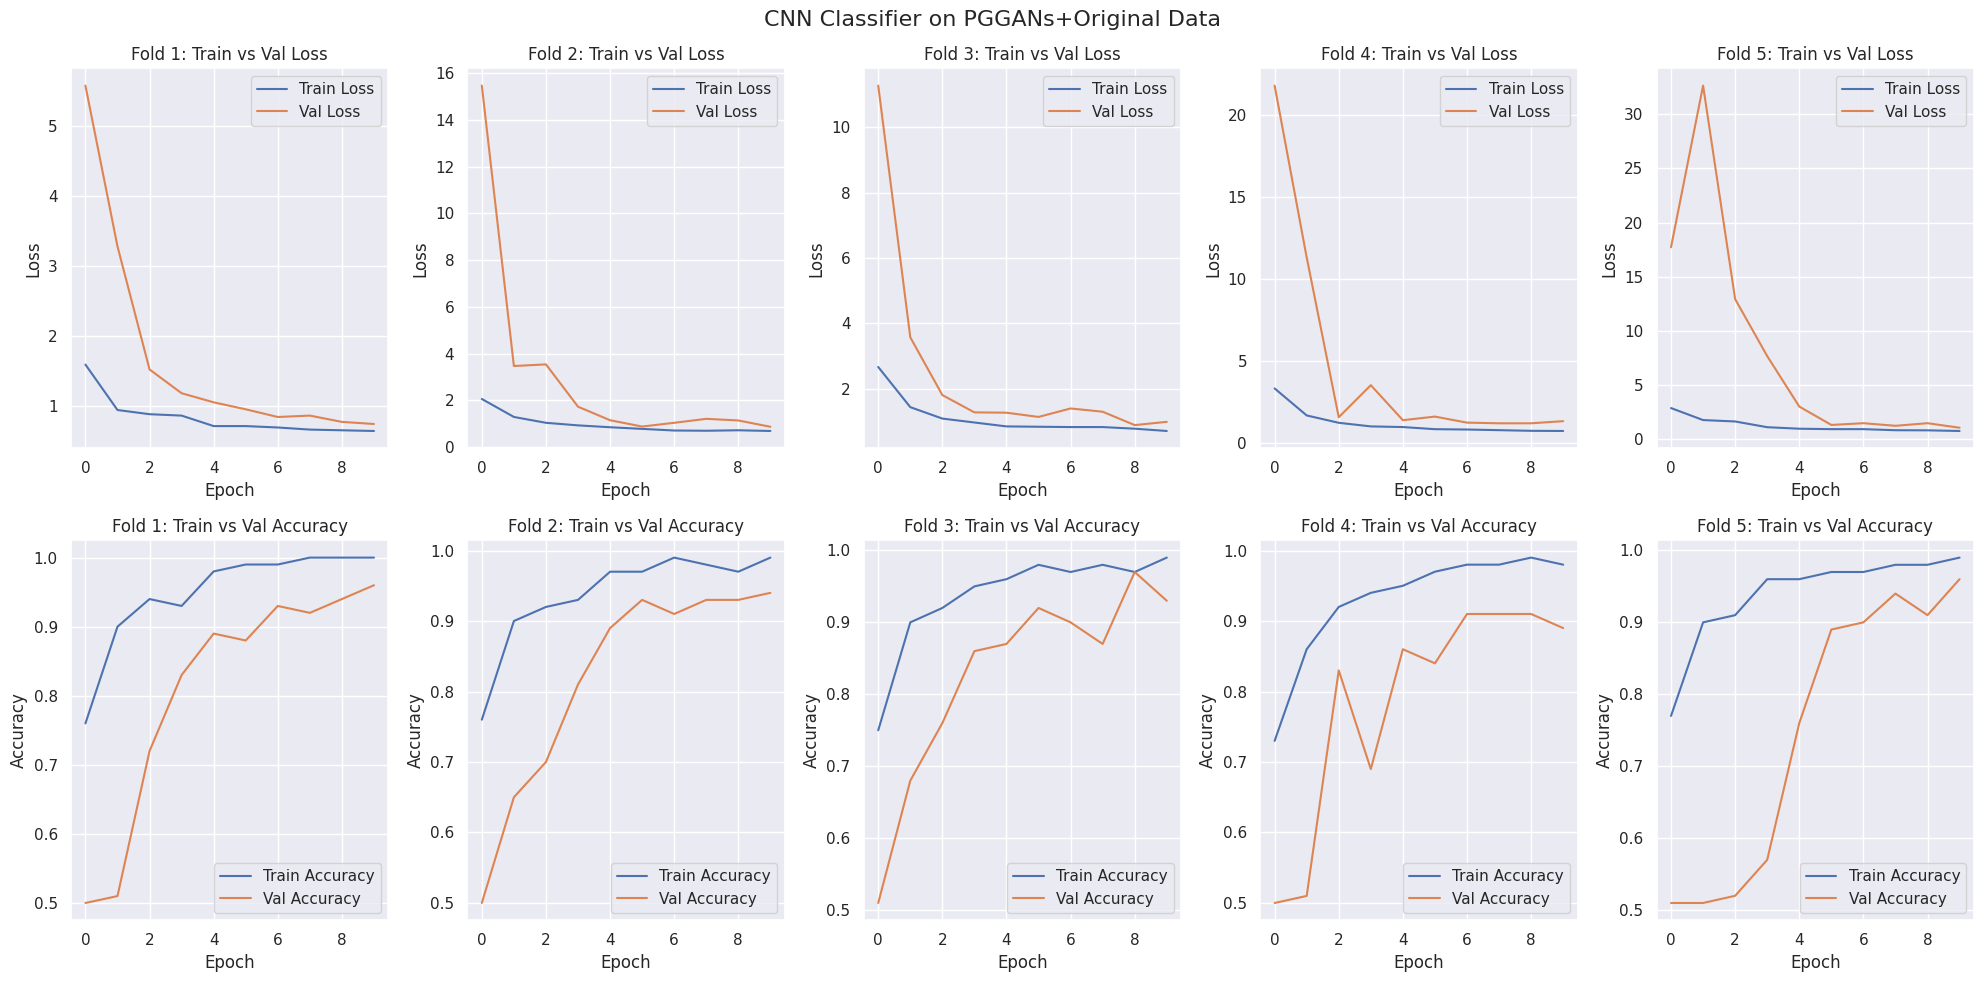

In [11]:
plot_train_history(MixPGGAN_Data_CNN_hist160, 'CNN Classifier on PGGANs+Original Data', 'cnn_pggan160.png')

In [12]:
PGGAN_CNN_metrics160, PGGAN_CNN_cf_matrix160=test_on_data(test_dataset_dir,  MixPGGAN_CNN_model160)

100/100 [==============================] - 5s 44ms/step - loss: 0.8729 - accuracy: 0.9304


In [13]:
PGGAN_CNN_metrics160


{'Test Loss': 0.8729,
 'Test Accuracy': 0.9304,
 'F1 Score': 0.93,
 'Sensitivity (Recall)': 0.93,
 'Precision': 0.93}

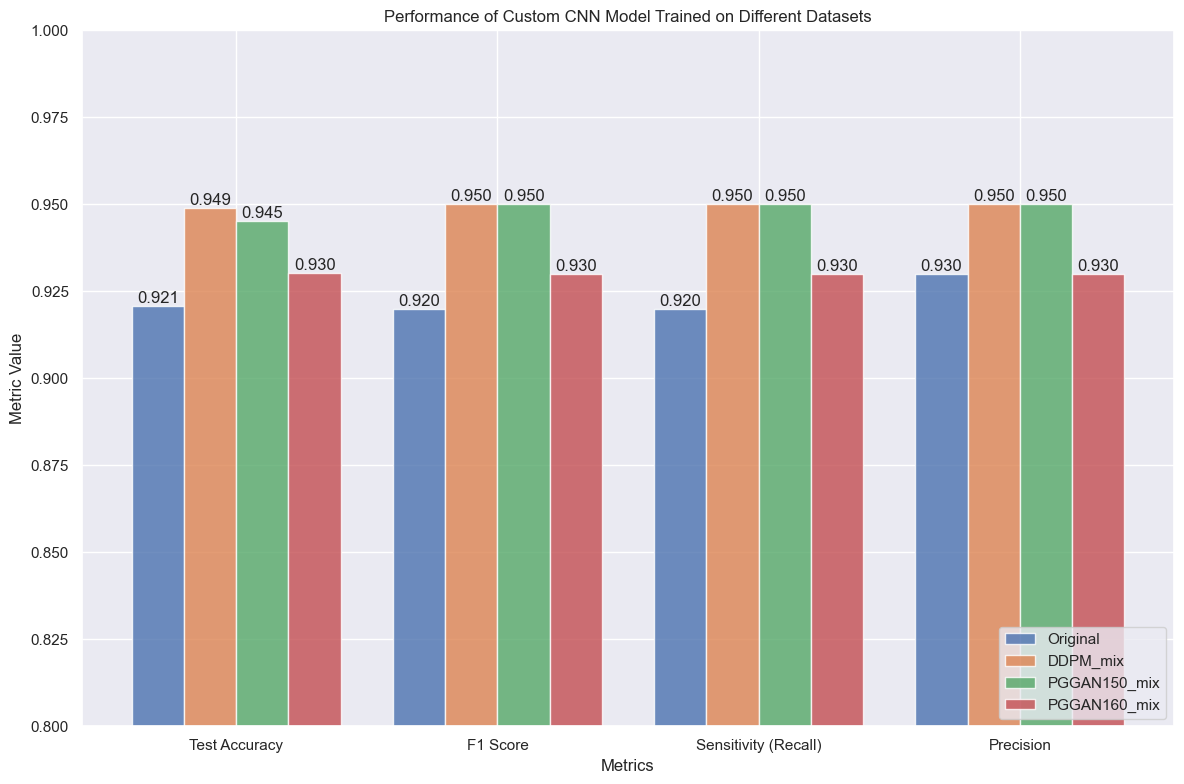

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Input data
models = ['Original', 'DDPM_mix', 'PGGAN150_mix', 'PGGAN160_mix']
metrics = ['Test Accuracy', 'F1 Score', 'Sensitivity (Recall)', 'Precision']

# Define the metrics data
data = {
    'Original': {
        'Test Loss': 0.9542,
        'Test Accuracy': 0.9208,
        'F1 Score': 0.92,
        'Sensitivity (Recall)': 0.92,
        'Precision': 0.93
    },
    'DDPM_mix': {
        'Test Accuracy': 0.9488,
        'F1 Score': 0.95,
        'Sensitivity (Recall)': 0.95,
        'Precision': 0.95
    },
    'PGGAN150_mix': {
        'Test Accuracy': 0.9453,
        'F1 Score': 0.95,
        'Sensitivity (Recall)': 0.95,
        'Precision': 0.95
    },
    'PGGAN160_mix': {
        'Test Accuracy': 0.9304,
        'F1 Score': 0.93,
        'Sensitivity (Recall)': 0.93,
        'Precision': 0.93
    }
}

#Arrange the data for plotting
num_models = len(models)
num_metrics = len(metrics)
bar_width = 0.2
index = np.arange(num_metrics)  # the label locations
opacity = 0.8

# Set seaborn style and color palette
sns.set_theme()

# Plotting each model grouped by metric
fig, ax = plt.subplots(figsize=(12, 8))

for i, model in enumerate(models):
    metric_values = [data[model][metric] for metric in metrics]
    ax.bar(index + i * bar_width, metric_values, bar_width, alpha=opacity, label=model)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Metric Value')
ax.set_title('Performance of Custom CNN Model Trained on Different Datasets')

# Set x-axis labels and ticks
ax.set_xticks(index + (num_models - 1) * bar_width / 2)
ax.set_xticklabels(metrics)
ax.set_ylim(0.8, 1.0)  # Adjust the limits as needed

# Annotate each bar with its value
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        value = data[model][metric]
        ax.text(index[j] + i * bar_width, value , f'{value:.3f}', ha='center', va='bottom')

# Place legend at the bottom right
ax.legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

